In [1]:
from deepforest import main
from deepforest import get_data
import os
import matplotlib.pyplot as plt

In [2]:
model = main.deepforest()

Reading config file: /Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
model.use_release()

Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [4]:
sample_image = get_data("OSBS_029.png")
sample_image

'/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/data/OSBS_029.png'

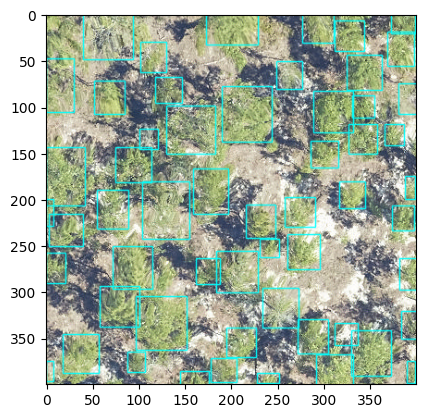

In [5]:
img = model.predict_image(path=sample_image,return_plot=True)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.
plt.imshow(img[:,:,::-1])

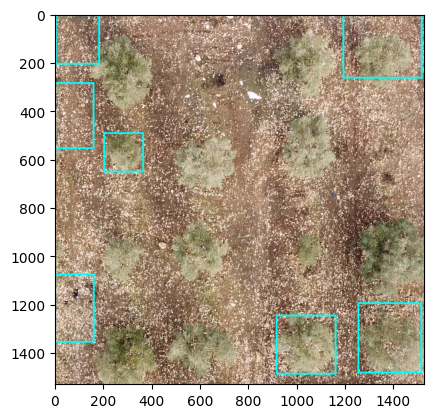

In [6]:
local_sample_path = '/Users/hakanonal/vscode/treecounter/data/geo.tiff'
img = model.predict_image(path=local_sample_path,return_plot=True,thickness=5)

#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.
plt.imshow(img[:,:,::-1])

In [7]:
boxes = model.predict_image(path=local_sample_path, return_plot = False)
boxes

,xmin,ymin,xmax,ymax,label,score,image_path
0,1192.0,0.0,1516.0,263.0,Tree,0.195805,geo.tiff
1,3.0,4.0,182.0,205.0,Tree,0.134054,geo.tiff
2,1254.0,1195.0,1514.0,1482.0,Tree,0.125694,geo.tiff
3,203.0,492.0,364.0,651.0,Tree,0.121643,geo.tiff
4,0.0,1076.0,160.0,1355.0,Tree,0.121359,geo.tiff
5,916.0,1246.0,1160.0,1487.0,Tree,0.110462,geo.tiff
6,0.0,285.0,159.0,554.0,Tree,0.103719,geo.tiff


100%|██████████| 49/49 [02:08<00:00,  2.63s/it]

47 predictions in overlapping windows, applying non-max supression
30 predictions kept after non-max suppression


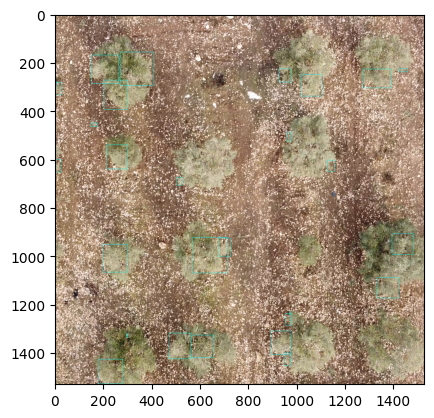

In [9]:
raster_path = '/Users/hakanonal/vscode/treecounter/data/geo.tiff'
predicted_raster = model.predict_tile(raster_path, return_plot = True, patch_size=300,patch_overlap=0.25)
plt.imshow(predicted_raster[:,:,::-1])

In [10]:
import rasterio

#img = get_data("OSBS_029.tif")
#img = "/Users/hakanonal/vscode/deepforest/data/s1.tif"
#img = "/Users/hakanonal/Downloads/temp_video_for_share.mp4"
img = "/Users/hakanonal/vscode/treecounter/data/geo.tiff"
r = rasterio.open(img)
transform = r.transform 
crs = r.crs
print(crs)

EPSG:4326


In [11]:
from deepforest import utilities

m = main.deepforest()
m.use_release(check_release=False)
df = m.predict_image(path=img)
gdf = utilities.annotations_to_shapefile(df, transform=transform, crs=crs)

Reading config file: /Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/utilities.py:431: UserWarning: This method is deprecated and will be removed in version DeepForest 2.0.0, please use boxes_to_shapefile which unifies project_boxes and annotations_to_shapefile functionalities
  warnings.warn("This method is deprecated and will be removed in version DeepForest 2.0.0, please use boxes_to_shapefile which unifies project_boxes and annotations_to_shapefile functionalities")


In [12]:
gdf

,xmin,ymin,xmax,ymax,label,score,image_path,geometry
0,1192.0,0.0,1516.0,263.0,Tree,0.195805,geo.tiff,"POLYGON ((179.67710 38.54540, 179.67710 12.245..."
1,3.0,4.0,182.0,205.0,Tree,0.134054,geo.tiff,"POLYGON ((46.27710 38.14540, 46.27710 18.04540..."
2,1254.0,1195.0,1514.0,1482.0,Tree,0.125694,geo.tiff,"POLYGON ((179.47710 -80.95460, 179.47710 -109...."
3,203.0,492.0,364.0,651.0,Tree,0.121643,geo.tiff,"POLYGON ((64.47710 -10.65460, 64.47710 -26.554..."
4,0.0,1076.0,160.0,1355.0,Tree,0.121359,geo.tiff,"POLYGON ((44.07710 -69.05460, 44.07710 -96.954..."
5,916.0,1246.0,1160.0,1487.0,Tree,0.110462,geo.tiff,"POLYGON ((144.07710 -86.05460, 144.07710 -110...."
6,0.0,285.0,159.0,554.0,Tree,0.103719,geo.tiff,"POLYGON ((43.97710 10.04540, 43.97710 -16.8546..."


In [ ]:
import ffmpeg
ffmpeg.probe("/Users/hakanonal/Downloads/temp_video_for_share.mp4")

In [ ]:
import subprocess

# init command
ffmpeg_command = ["ffmpeg", "-i","~/Downloads/temp_video_for_share.mp4", "-map", "0:s:0", "data/subs.srt", "pipe:1"]

# excute ffmpeg command
pipe = subprocess.run(ffmpeg_command,
                    stdout=subprocess.PIPE,
                    stderr=subprocess.PIPE,
                    bufsize=10**8)

# debug
print(pipe.stdout, pipe.stderr)



In [ ]:
import ffmpeg
ffmpeg.input("/Users/hakanonal/Downloads/temp_video_for_share.mp4").output("data/subs.srt", map = "0:s:0").run(overwrite_output=True)


In [ ]:
import ffmpeg
ffmpeg.input("/Users/hakanonal/Downloads/temp_video_for_share.mp4").output("output_%05d.png",r=1).run(overwrite_output=True)

I've asked to chatGPT:
can you write me a code that creates geotiff from a png file and text? Here it is...

In [ ]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.crs import CRS
from PIL import Image
import numpy as np

# Open the PNG file as an image
png = Image.open('data/imgsFromVid/output_00251.png')

# Extract the width and height of the image
width, height = png.size

crs = CRS.from_epsg(4326)
#left=28.0271
#top=38.5954
left, top, right, bottom = png.getbbox()
left, bottom, right, top = map(int, (left, bottom, right, top))

# Set the metadata for the GeoTIFF
meta = {
    'driver': 'GTiff',
    'dtype': 'uint8',
    'nodata': 0,
    'width': width,
    'height': height,
    'count': 3,
    'crs': CRS.from_epsg(4326),  # Set the coordinate reference system (CRS) to WGS 84 (EPSG: 4326)
    'transform': calculate_default_transform(dst_crs= CRS.from_epsg(4326), src_crs=  CRS.from_epsg(4326), width= width, height= height, left=0,right=1,top=0,bottom=1)
}

# Create a new GeoTIFF file
with rasterio.open('data/firstGeo.tiff', 'w', **meta) as dst:
    # Convert the PNG image to a NumPy array
    png_array = np.asarray(png)

    # Write the text to the GeoTIFF
    dst.write(png_array)


In [ ]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.crs import CRS
from PIL import Image
import numpy as np

# Open the PNG file as an image
png = Image.open('data/imgsFromVid/output_00251.png')
width, height = png.size
crs = CRS.from_epsg(4326)
left, top, right, bottom = png.getbbox()
left, bottom, right, top = map(int, (left, bottom, right, top))
print(left)
print(top)
print(right)
print(bottom)
print(width)
print(height)


In [ ]:
transform = calculate_default_transform(dst_crs= CRS.from_epsg(4326), src_crs=  CRS.from_epsg(4326), width= width, height= height, left=0,right=height,top=0,bottom=width)
transform

Finally I've asked the correct question and got the answer incouple of iterations:
```
instead of transforming can I directly write the latitude and longitude statically on a non geo coded image simple plain image?
```

In [ ]:
import rasterio
from rasterio.transform import from_origin
from rasterio.windows import Window

def geoCodeImage(inputFileName,latidute,longitude):
    src = rasterio.open('data/imgsFromVid/%s.png'%inputFileName)
    width, height = src.width, src.height
    size = min(width, height)

    # Set the metadata for the GeoTIFF
    meta = {
        'driver': 'GTiff',
        'dtype': 'uint8',
        'nodata': 0,
        'width': size,
        'height': size,
        'count': 3,
        'crs': rasterio.crs.CRS.from_epsg(4326),  # Set the CRS to EPSG: 4326 (WGS 84)
        'transform': from_origin(latidute, longitude, 0.1, 0.1)  # Set the latitude and longitude coordinates as the origin
    }

    # Create the GeoTIFF file
    with rasterio.open('data/geoCodedImgs/%s.tiff'%inputFileName, 'w', **meta) as dst:
        x_offset = (width - size) // 2
        y_offset = (height - size) // 2
        window = Window(x_offset, y_offset, size, size)

        # Copy the data from the source image to the GeoTIFF
        dst.write(src.read(window=window))

    src.close()

In [ ]:
geoCodeImage("output_00251",28.0271,38.5954)

In [18]:
from deepforest import main
from deepforest import utilities
import rasterio

path = 'data/geoCodedImgs/%s.tiff'%"output_00251"
r = rasterio.open(path)
transform = r.transform 
crs = r.crs
r.close()

m = main.deepforest()
m.use_release(check_release=False)
df = m.predict_image(path=path)
gdf = utilities.annotations_to_shapefile(df, transform=transform, crs=crs)
gdf

Reading config file: /Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/data/deepforest_config.yml


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


/Users/hakanonal/opt/anaconda3/envs/treecounter/lib/python3.9/site-packages/deepforest/utilities.py:431: UserWarning: This method is deprecated and will be removed in version DeepForest 2.0.0, please use boxes_to_shapefile which unifies project_boxes and annotations_to_shapefile functionalities
  warnings.warn("This method is deprecated and will be removed in version DeepForest 2.0.0, please use boxes_to_shapefile which unifies project_boxes and annotations_to_shapefile functionalities")


,xmin,ymin,xmax,ymax,label,score,image_path,geometry
0,1192.0,0.0,1516.0,263.0,Tree,0.195805,output_00251.tiff,"POLYGON ((179.67710 38.54540, 179.67710 12.245..."
1,3.0,4.0,182.0,205.0,Tree,0.134054,output_00251.tiff,"POLYGON ((46.27710 38.14540, 46.27710 18.04540..."
2,1254.0,1195.0,1514.0,1482.0,Tree,0.125694,output_00251.tiff,"POLYGON ((179.47710 -80.95460, 179.47710 -109...."
3,203.0,492.0,364.0,651.0,Tree,0.121643,output_00251.tiff,"POLYGON ((64.47710 -10.65460, 64.47710 -26.554..."
4,0.0,1076.0,160.0,1355.0,Tree,0.121359,output_00251.tiff,"POLYGON ((44.07710 -69.05460, 44.07710 -96.954..."
5,916.0,1246.0,1160.0,1487.0,Tree,0.110462,output_00251.tiff,"POLYGON ((144.07710 -86.05460, 144.07710 -110...."
6,0.0,285.0,159.0,554.0,Tree,0.103719,output_00251.tiff,"POLYGON ((43.97710 10.04540, 43.97710 -16.8546..."


In [ ]:
import os

example_paths = [
    "FileName", 
    "./FileName",
    "../../FileName",
    "FileName.txt", 
    "./FileName.txt.zip.asc",
    "/path/to/some/FileName",
    "/path/to/some/FileName.txt",
    "/path/to/some/FileName.txt.zip.asc"
]

for example_path in example_paths:
    print(os.path.basename(example_path).split('.')[0])

In [13]:
import re
import pandas as pd

class SrtParser:
    def __init__(self,path):
        self.path = path
        file_to_read = open(path,'r')
        self.data = file_to_read.read()
        file_to_read.close()
        self.subtitles = pd.DataFrame(columns=['index','start','end','text','latitude','longitude','distance','height','horizontal_speed','vertical_speed'])

    def parseTime(self,time_str):
        # Extract hours, minutes, and seconds from the time string
        hours, minutes, seconds_milliseconds = time_str.split(':')
        seconds, milliseconds = seconds_milliseconds.split(',')
        
        # Convert hours, minutes, and seconds to integers
        hours = int(hours)
        minutes = int(minutes)
        seconds = int(seconds)
        milliseconds = int(milliseconds)
        
        # Return the total number of milliseconds
        return (hours * 3600 + minutes * 60 + seconds) * 1000 + milliseconds


    def parseSubtitle(self,subtitle_str):
        # Split the subtitle string into lines
        lines = subtitle_str.strip().split('\n')
        
        # Extract the index, start, and end times from the first line
        index = int(lines[0])
        start, end = map(self.parseTime, lines[1].split(' --> '))
        
        # Join the remaining lines into a single string
        text = '\n'.join(lines[2:])
        
        # Create and return a Subtitle object
        new_subtitle = pd.DataFrame.from_dict({
            'index': [index],
            'start': [start],
            'end': [end],
            'text': [text],
            'longitude': [float(text.split(',')[4].lstrip('GPS ('))],
            'latitude': [float(text.split(',')[5])],
            'distance': [float(text.split(',')[7].lstrip('D ').rstrip('m'))],
            'height': [float(text.split(',')[8].lstrip('H ').rstrip('m'))],
            'horizontal_speed': [float(text.split(',')[9].lstrip('H.S ').rstrip('m/s'))],
            'vertical_speed': [float(text.split(',')[10].lstrip('V.S ').rstrip('m/s'))]
        })
        self.subtitles = pd.concat([self.subtitles,new_subtitle],ignore_index=True)

    def parseSrt(self,srt_str):
        # Split the srt string into a list of subtitle strings
        subtitles = re.split('\n\n+', srt_str.strip())
        
        # Parse each subtitle string and return a list of Subtitle objects
        for subtitle in subtitles:
            self.parseSubtitle(subtitle)
        return self.subtitles
    
    def parse(self):
        return self.parseSrt(self.data)

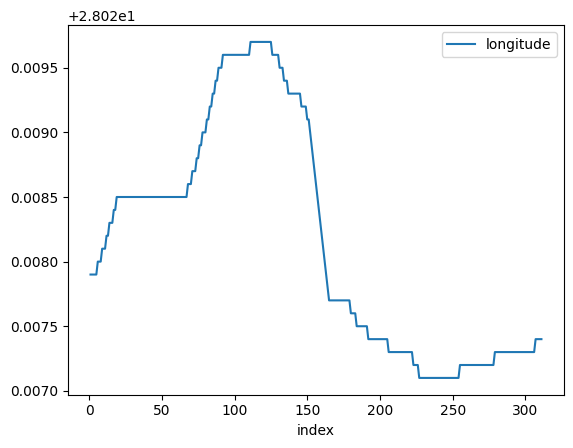

In [14]:
import matplotlib.pyplot as plt

parser = SrtParser("/Users/hakanonal/vscode/treecounter/data/subs.srt")
subtitles = parser.parse()
subtitles.plot(x='index',y='longitude',kind='line')
plt.show()